# **Seaborn: lineplot**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip

--2021-04-11 23:24:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240539 (235K) [application/x-httpd-php]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 234.90K   445KB/s    in 0.5s    

2021-04-11 23:24:46 (445 KB/s) - ‘dataset.zip’ saved [240539/240539]



In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: dataset.csv             


In [ ]:
df = pd.read_csv('dataset.csv', parse_dates=[3])
df.head()

SystemCodeNumber  Capacity  Occupancy         LastUpdated
0      BHMBCCMKT01       577         61 2016-10-04 07:59:42
1      BHMBCCMKT01       577         64 2016-10-04 08:25:42
2      BHMBCCMKT01       577         80 2016-10-04 08:59:42
3      BHMBCCMKT01       577        107 2016-10-04 09:32:46
4      BHMBCCMKT01       577        150 2016-10-04 09:59:48

Do a bit of data cleaning: 
- Rename some columns 
- Create three new date/time columns for later aggregations
- Filter down to only two garage locations

In [ ]:
df.rename(columns={'SystemCodeNumber': 'Location', 'LastUpdated': 'Timestamp'}, inplace=True)
df['Day'] = df.Timestamp.dt.date
df['Month'] = df.Timestamp.dt.month
df['Hour'] = df.Timestamp.dt.hour

In [ ]:
park = df[df.Location.isin(['Broad Street', 'NIA South'])]
park.head()

Location  Capacity  Occupancy  ...         Day Month  Hour
20171  Broad Street       690        178  ...  2016-10-04    10     7
20172  Broad Street       690        269  ...  2016-10-04    10     8
20173  Broad Street       690        415  ...  2016-10-04    10     8
20174  Broad Street       690        530  ...  2016-10-04    10     9
20175  Broad Street       690        600  ...  2016-10-04    10     9

[5 rows x 7 columns]

**Intro Visuals**

In [ ]:
blue, orange, green, red = sns.color_palette()[:4]

In [ ]:
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('date.autoformatter', day='%b %Y')

In [ ]:
months = [pd.datetime(2016, 10, 1), pd.datetime(2016, 11, 1), pd.datetime(2016, 12, 1)];

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


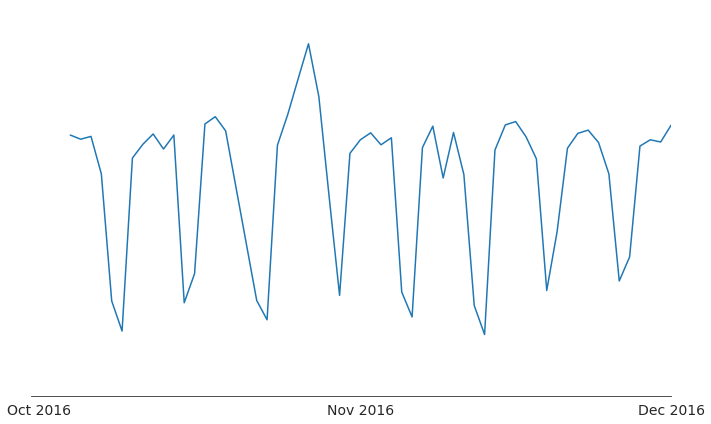

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(park.Day, park.Occupancy, ci=None)
plt.xticks(months)
plt.yticks([])
plt.xlim(None, pd.datetime(2016, 12, 1))
plt.ylim(0, 570)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout();
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


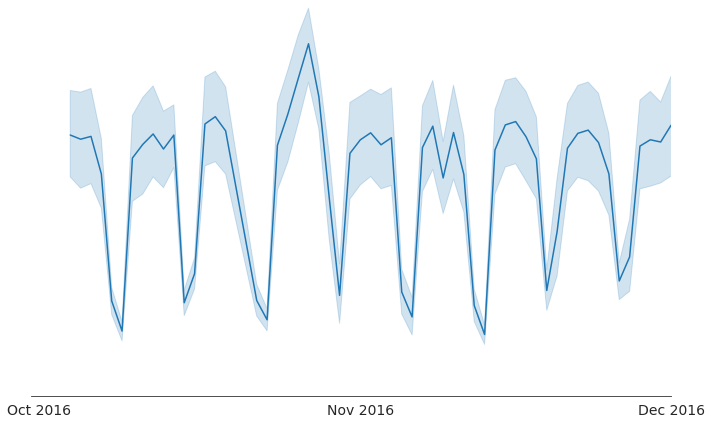

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(park.Day, park.Occupancy)
plt.xticks(months)
plt.yticks([])
plt.xlim(None, pd.datetime(2016, 12, 1))
plt.ylim(0, 570)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


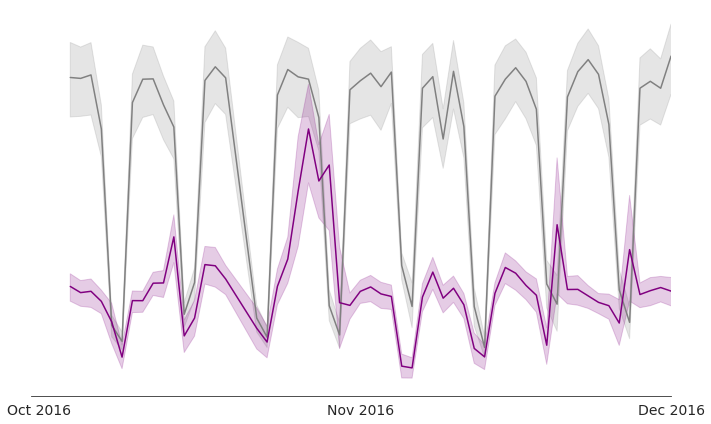

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(park.Day, park.Occupancy, hue=park.Location, palette=['gray', 'purple'])
plt.xticks(months)
plt.yticks([])
plt.xlim(None, pd.datetime(2016, 12, 1))
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('')
plt.legend([], frameon=False)
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


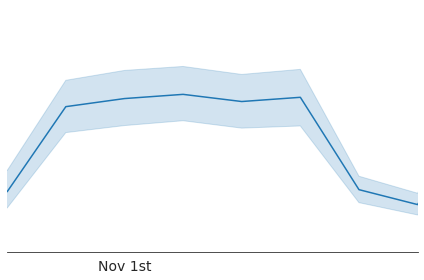

In [ ]:
plt.rc('date.autoformatter', day='%b 1st')
plt.figure(figsize=(6,4))
sns.lineplot(park.Day, park.Occupancy)
plt.xticks(months)
plt.yticks([])
plt.xlim(pd.datetime(2016, 10, 30), pd.datetime(2016, 11, 6))
sns.despine(left=True)
plt.ylim(0, 600)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


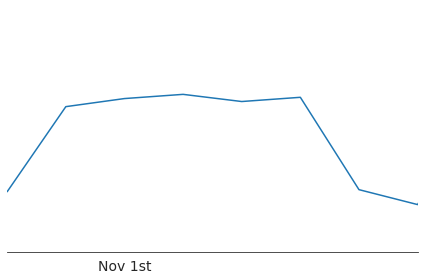

In [ ]:
plt.rc('date.autoformatter', day='%b 1st')
plt.figure(figsize=(6,4))
sns.lineplot(park.Day, park.Occupancy, ci=None)
plt.xticks(months)
plt.yticks([])
plt.xlim(pd.datetime(2016, 10, 30), pd.datetime(2016, 11, 6))
plt.ylim(0, 600)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout();

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Basics

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

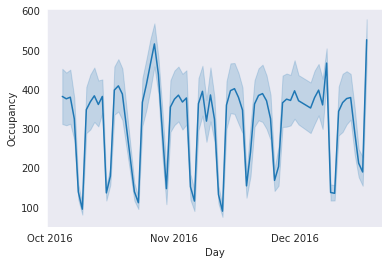

In [ ]:
sns.set_style('dark')
months = [pd.datetime(2016, 10, 1), 
          pd.datetime(2016, 11, 1), 
          pd.datetime(2016, 12, 1)]
plt.rc('date.autoformatter', day='%b %Y');
sns.lineplot(park.Day, park.Occupancy)
plt.xticks(months);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


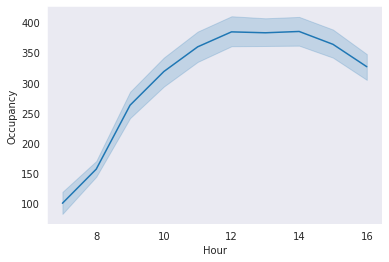

In [ ]:
sns.lineplot(park.Hour, park.Occupancy);

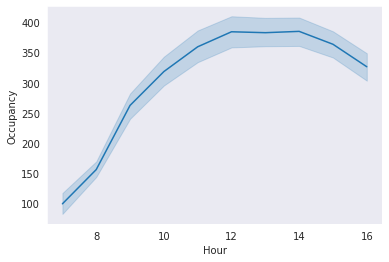

In [ ]:
sns.lineplot(x='Hour', y='Occupancy', data=park);

## Bootstrapping

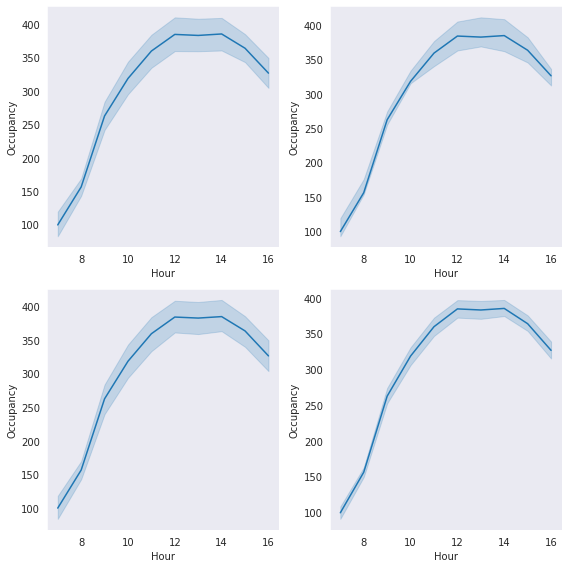

In [ ]:
plt.rcParams["figure.figsize"]=(8,8)
plt.figure()
plt.subplot(221)
sns.lineplot(x='Hour', y='Occupancy', data=park, n_boot=1000);

plt.subplot(222)
sns.lineplot(x='Hour', y='Occupancy', data=park, n_boot=10 );

plt.subplot(223)
sns.lineplot(x='Hour', y='Occupancy', data=park, ci=95 );

plt.subplot(224)
sns.lineplot(x='Hour', y='Occupancy', data=park, ci=68);

plt.tight_layout()
plt.show()

To turn off the bootstrapped confidence intervals, set `ci=None` to trigger early exit within Seaborn code.  (A conditional checks for this case and completely bypasses the bootstrapping procedure if `ci` is set to `None`.  This saves time if confidence intervals are not needed!)

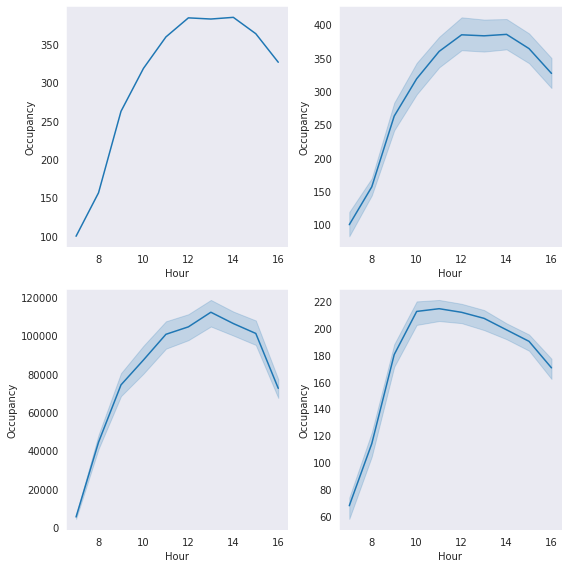

In [ ]:
plt.rcParams["figure.figsize"]=(8,8)
plt.figure()

plt.subplot(221)
sns.lineplot(x='Hour', y='Occupancy', data=park, ci=None);
plt.subplot(222)
sns.lineplot(x='Hour', y='Occupancy', data=park, estimator='mean');
plt.subplot(223)
sns.lineplot(x='Hour', y='Occupancy', data=park, estimator='sum');
plt.subplot(224)
sns.lineplot(x='Hour', y='Occupancy', data=park, estimator='std');

plt.tight_layout()
plt.show()

## Visual Semantics

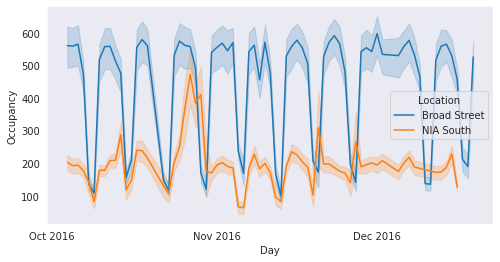

In [ ]:
# hue
plt.rcParams["figure.figsize"]=(8,4)
sns.lineplot(x='Day', y='Occupancy', data=park, hue='Location')
plt.xticks(months);

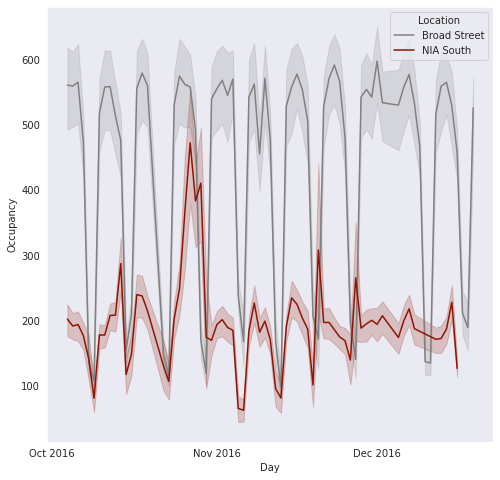

In [ ]:
sns.lineplot(x='Day', y='Occupancy', data=park, hue='Location',
             palette = ['gray', 'xkcd:brick red'])

plt.xticks(months);

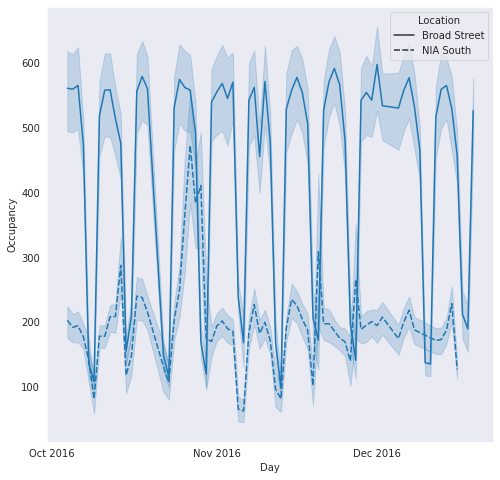

In [ ]:
# style
sns.lineplot(x='Day', y='Occupancy', data=park, style='Location')
plt.xticks(months);

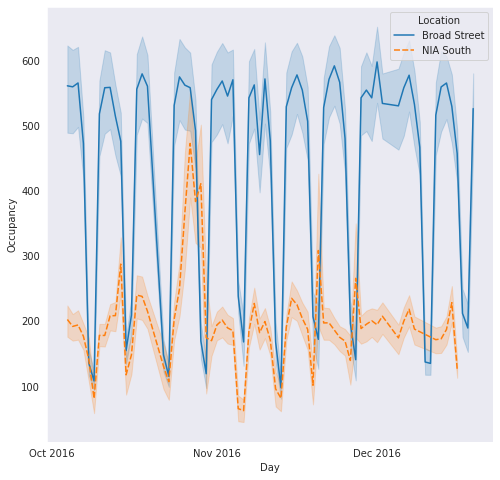

In [ ]:
sns.lineplot(x='Day', y='Occupancy', data=park, hue="Location",style='Location')
plt.xticks(months);

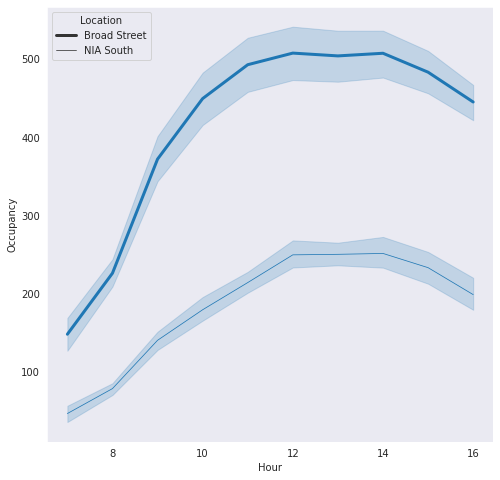

In [ ]:
# size
sns.lineplot(x='Hour', y='Occupancy', data=park, size='Location',);

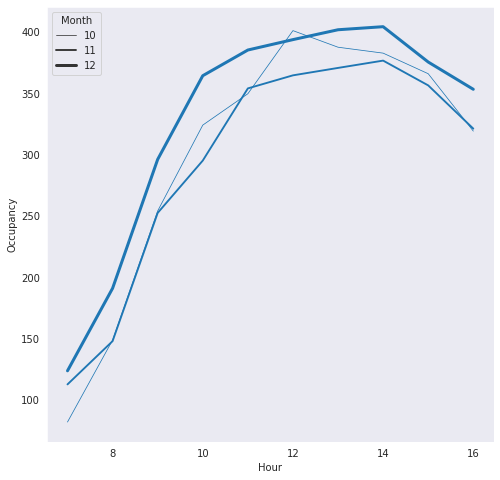

In [ ]:
sns.lineplot(x='Hour', y='Occupancy', data=park, ci=None, size='Month' );

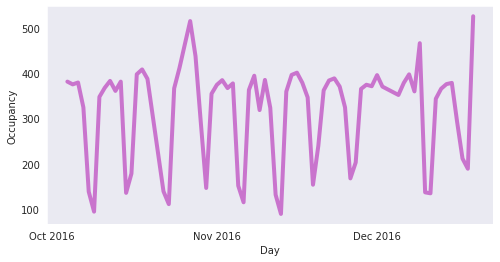

In [ ]:
# Style
plt.rcParams["figure.figsize"]=(8,4)
sns.lineplot(x='Day', y='Occupancy', data=park, ci=None, lw=4, color='#aa00aa', alpha=0.5)
plt.xticks(months);

# **Seaborn : regplot**

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
diamonds = sns.load_dataset('diamonds')
print(diamonds.shape)
diamonds.head()

(53940, 10)


carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [ ]:
diamonds = diamonds.sample(n=200, random_state=44)
diamonds.shape

(200, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


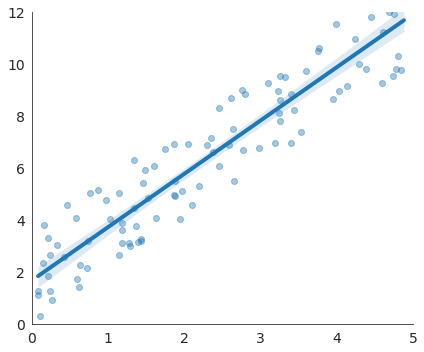

In [ ]:
import numpy as np
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
blue, orange, green, red = sns.color_palette()[:4]

x_vals = np.random.rand(100)*5
y_vals_posTwo = x_vals*2 + np.random.rand(100)*4
y_vals_posHalf = x_vals*0.5 + np.random.rand(100)*3 + 2
y_vals_negOne = x_vals*(-1) + np.random.rand(100)*3 + 6

plt.figure(figsize=(6, 5))
sns.regplot(x_vals, y_vals_posTwo, scatter_kws={'alpha': 0.4}, line_kws={'lw': 4})
sns.despine()
plt.xlim(0, 5)
plt.ylim(0, 12)
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


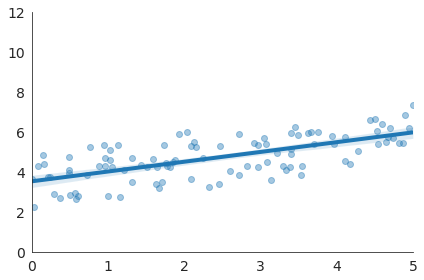

In [ ]:
plt.figure(figsize=(6, 4))
sns.regplot(x_vals, y_vals_posHalf, scatter_kws={'alpha': 0.4}, line_kws={'lw': 4})
sns.despine()
plt.xlim(0, 5)
plt.ylim(0, 12)
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


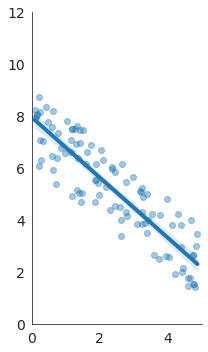

In [ ]:
plt.figure(figsize=(3, 5))
sns.regplot(x_vals, y_vals_negOne, scatter_kws={'alpha': 0.4}, line_kws={'lw': 4})
sns.despine()
plt.xlim(0, 5)
plt.ylim(0, 12)
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


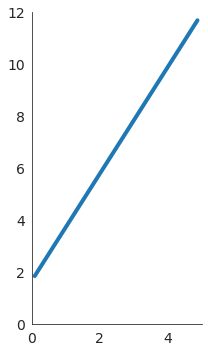

In [ ]:
plt.figure(figsize=(3, 5))
plt.gca().set(xlim=(0, 5))
sns.regplot(x_vals, y_vals_posTwo, scatter=False, ci=None, line_kws={'lw': 4})
sns.despine()
plt.xlim(0, 5)
plt.ylim(0, 12)
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


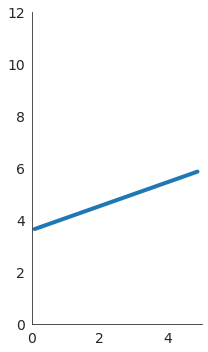

In [ ]:
plt.figure(figsize=(3, 5))
plt.gca().set(xlim=(0, 5))
sns.regplot(x_vals, y_vals_posHalf, scatter=False, ci=None, line_kws={'lw': 4})
sns.despine()
plt.xlim(0, 5)
plt.ylim(0, 12)
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


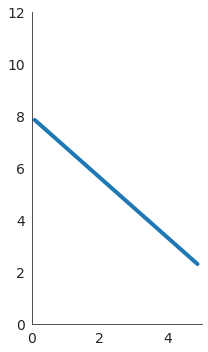

In [ ]:
plt.figure(figsize=(3, 5))
plt.gca().set(xlim=(0, 5))
sns.regplot(x_vals, y_vals_negOne, scatter=False, ci=None, line_kws={'lw': 4})
sns.despine()
plt.xlim(0, 5)
plt.ylim(0, 12)
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


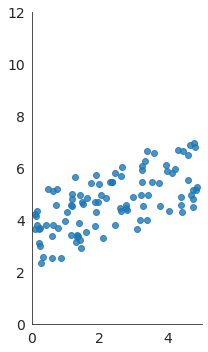

In [ ]:
plt.figure(figsize=(3, 5))
plt.gca().set(xlim=(0, 5))
sns.regplot(x_vals, y_vals_posHalf, fit_reg=False)
sns.despine()
plt.xlim(0, 5)
plt.ylim(0, 12)
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


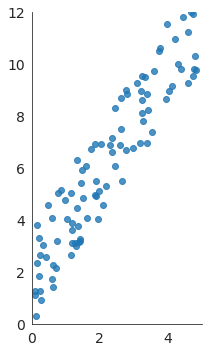

In [ ]:
plt.figure(figsize=(3, 5))
plt.gca().set(xlim=(0, 5))
sns.regplot(x_vals, y_vals_posTwo, fit_reg=False)
sns.despine()
plt.xlim(0, 5)
plt.ylim(0, 12)
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


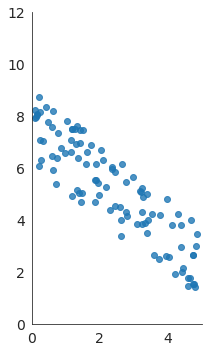

In [ ]:
plt.figure(figsize=(3, 5))
plt.gca().set(xlim=(0, 5))
sns.regplot(x_vals, y_vals_negOne, fit_reg=False)
sns.despine()
plt.xlim(0, 5)
plt.ylim(0, 12)
plt.tight_layout();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


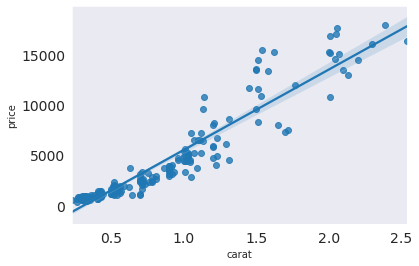

In [ ]:
sns.set_style('dark')
sns.regplot(diamonds.carat, diamonds.price);

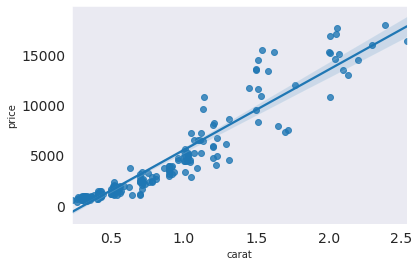

In [ ]:
sns.regplot(x='carat', y='price', data=diamonds);

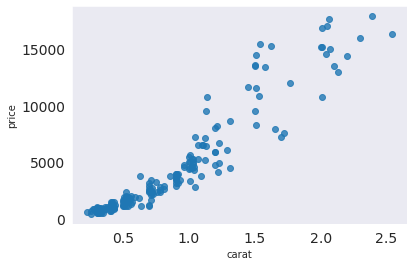

In [ ]:
sns.regplot(x='carat', y='price', data=diamonds, fit_reg=False);

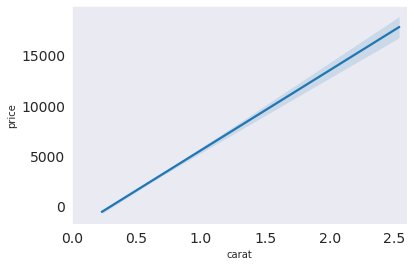

In [ ]:
plt.gca().set(xlim=(0,2.6))
sns.regplot(x='carat', y='price', data=diamonds, scatter=False);

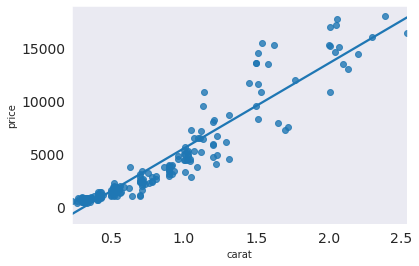

In [ ]:
sns.regplot(x='carat', y='price', data=diamonds, ci=None);

In [ ]:
cut_map = { 'Fair': 1,'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}

diamonds['cut_value'] = diamonds.cut.map(cut_map)
diamonds.cut_value.value_counts()

5    80
4    63
3    39
2    11
1     7
Name: cut_value, dtype: int64

In [ ]:
sns.regplot(x='cut_value', y='price', data=diamonds,
            x_jitter=0.1
           );

TypeError: ignored

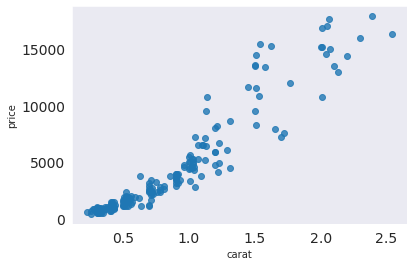

In [ ]:
# polynomial
sns.regplot(x='carat', y='price', data=diamonds,
            fit_reg=False);

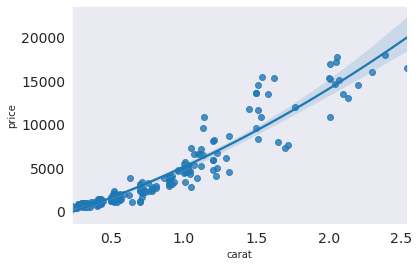

In [ ]:
sns.regplot(x='carat', y='price', data=diamonds,
            order=2
            );

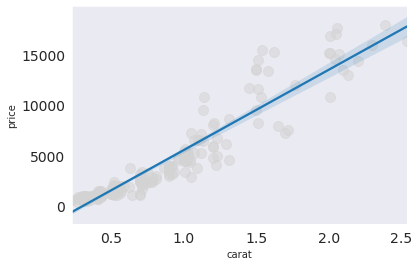

In [ ]:
sns.regplot(x='carat', y='price', data=diamonds,
            scatter_kws={'s': 100, 'alpha': 0.5, 'color': 'lightgray'}
            );

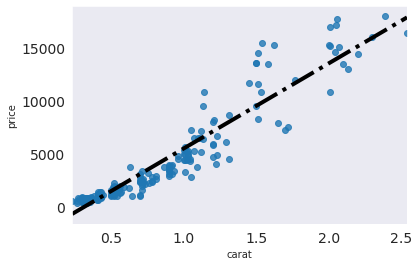

In [ ]:
sns.regplot(x='carat', y='price', data=diamonds,
            ci=None,
            line_kws={'lw': 4, 'color': 'black', 'linestyle': '-.'}
            );

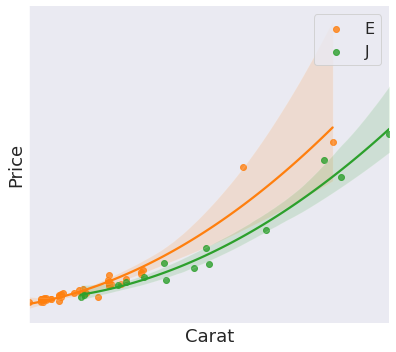

In [ ]:
blue, orange, green, red = sns.color_palette()[:4]

p = sns.lmplot(x='carat', y='price', 
               data=diamonds[diamonds.color.isin(['E', 'J'])], 
               hue='color', 
               order=2,
               palette=[green, orange])
plt.xlabel('Carat', fontsize=18)
plt.ylabel('Price', fontsize=18)
p._legend.remove()
plt.legend(fontsize=16)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

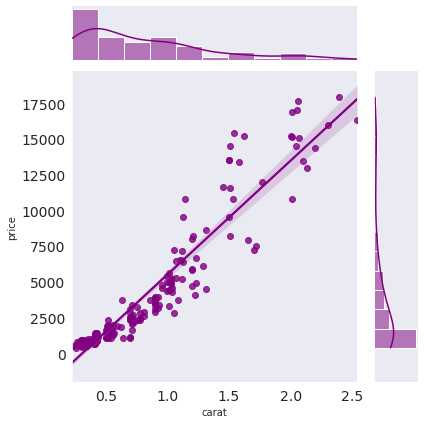

In [ ]:
sns.jointplot(x='carat', y='price', data=diamonds, 
              kind='reg', 
              color='purple')
plt.xlabel('')
plt.ylabel('')
plt.xlim(-0.1, None)
plt.ylim(-2000, None)
plt.tight_layout();

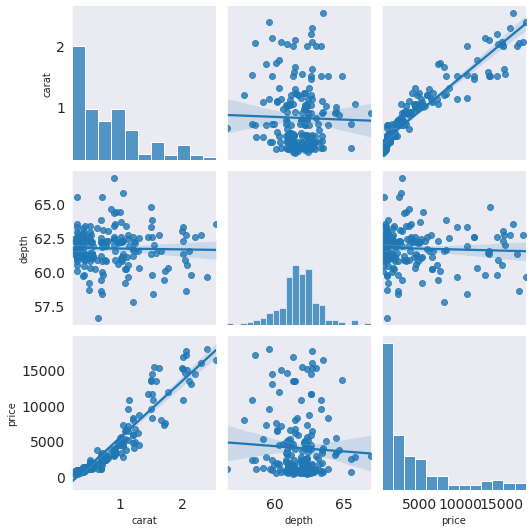

In [ ]:
sns.pairplot(diamonds[['carat', 'depth', 'price']], 
             kind='reg', 
             palette='colorblind')
plt.tight_layout();

# **Seaborn heatmap**

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

cars = sns.load_dataset('mpg')
cars.head()

mpg  cylinders  displacement  ...  model_year  origin                       name
0  18.0          8         307.0  ...          70     usa  chevrolet chevelle malibu
1  15.0          8         350.0  ...          70     usa          buick skylark 320
2  18.0          8         318.0  ...          70     usa         plymouth satellite
3  16.0          8         304.0  ...          70     usa              amc rebel sst
4  17.0          8         302.0  ...          70     usa                ford torino

[5 rows x 9 columns]

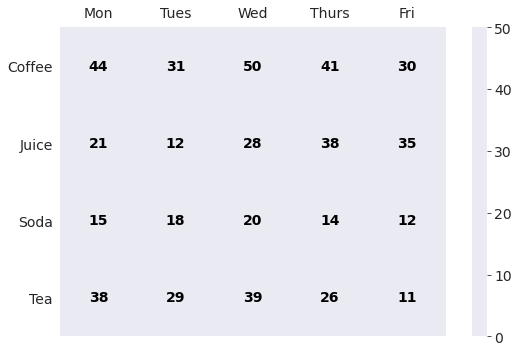

In [ ]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

xlabels = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri']
ylabels = ['Coffee', 'Juice', 'Soda', 'Tea']

orders = np.array([[44, 31, 50, 41, 30], 
                   [21, 12, 28, 38, 35],
                   [15, 18, 20, 14, 12],
                   [38, 29, 39, 26, 11]])

plt.figure(figsize=(8,5))
sns.heatmap(orders, 
            cmap='YlOrBr',
            vmin=0,
            xticklabels=xlabels,
            yticklabels=ylabels,
            annot=True,
            alpha=0,
            square=True,
            annot_kws={'fontsize':14, 'fontweight': 'bold', 'color': 'black'}
           )
plt.yticks(rotation=0)
plt.tick_params(
    which='both',      
    bottom=False,      
    left=False,      
    labelbottom=False,
    labeltop=True) 
plt.tight_layout();

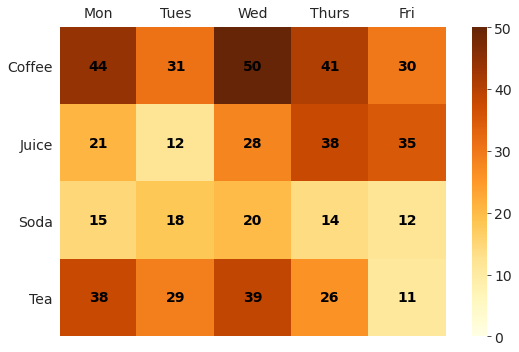

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(orders, 
            cmap='YlOrBr',
            vmin=0,
            xticklabels=xlabels,
            yticklabels=ylabels,
            annot=True,
            square=True,
            annot_kws={'fontsize':14, 'fontweight': 'bold', 'color': 'black'}
           )
plt.yticks(rotation=0)
plt.tick_params(
    which='both',      
    bottom=False,      
    left=False,      
    labelbottom=False,
    labeltop=True) 
plt.tight_layout();

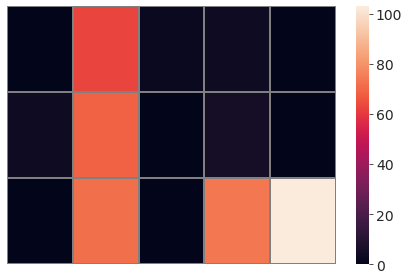

In [ ]:
# color pallete
origin_cyl_arr = np.array([[  0.,  63.,   3.,   4.,   0.],
                           [  4.,  69.,   0.,   6.,   0.],
                           [  0.,  72.,   0.,  74., 103.]])

sns.heatmap(origin_cyl_arr, 
            xticklabels=[], 
            yticklabels=[],
            cmap='rocket',
            linewidth=1,
            linecolor='gray'
           )
plt.tight_layout();

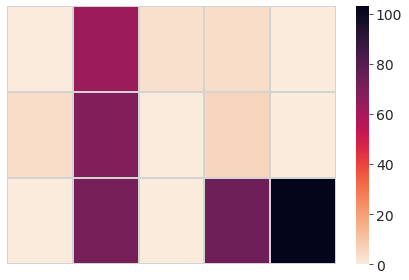

In [ ]:
sns.heatmap(origin_cyl_arr, 
            xticklabels=[], 
            yticklabels=[],
            cmap='rocket_r',
            linewidth=1,
            linecolor='lightgray'
           )
plt.tight_layout();

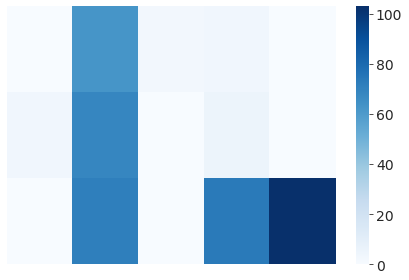

In [ ]:
sns.heatmap(origin_cyl_arr, 
            xticklabels=[], 
            yticklabels=[],
            cmap='Blues'
           )
plt.tight_layout();

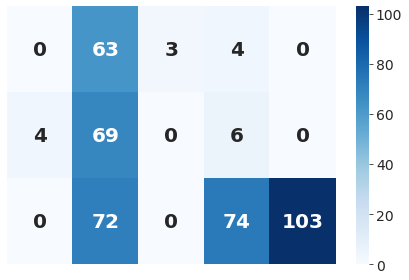

In [ ]:
sns.heatmap(origin_cyl_arr, 
            xticklabels=[], 
            yticklabels=[],
            cmap='Blues',
            annot=True,
            fmt='.0f',
            annot_kws={'fontsize':20, 'fontweight': 'bold'}
           )
plt.tight_layout();
plt.savefig('11heatmap_example_withannot.svg')

In [ ]:
cars.groupby('origin').cylinders.value_counts()

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: cylinders, dtype: int64

In [ ]:
(cars
 .groupby('origin')
 .cylinders
 .value_counts()
 .unstack()
 .fillna(0)
)

cylinders    3     4    5     6      8
origin                                
europe     0.0  63.0  3.0   4.0    0.0
japan      4.0  69.0  0.0   6.0    0.0
usa        0.0  72.0  0.0  74.0  103.0

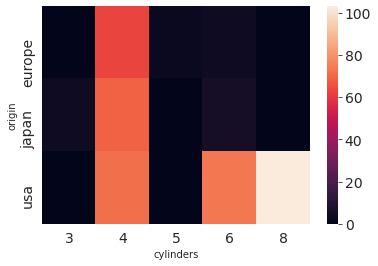

In [ ]:
origin_cyl = (
    cars
    .groupby('origin')
    .cylinders
    .value_counts()
    .unstack()
    .fillna(0))

sns.heatmap(origin_cyl);

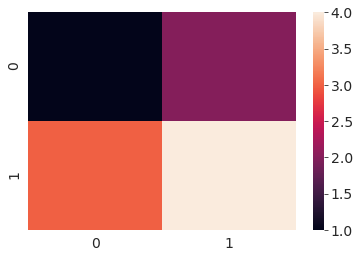

In [ ]:
# array
test_array = np.array([[1, 2], [3, 4]])
sns.heatmap(test_array);

In [ ]:
origin_cyl.T

origin     europe  japan    usa
cylinders                      
3             0.0    4.0    0.0
4            63.0   69.0   72.0
5             3.0    0.0    0.0
6             4.0    6.0   74.0
8             0.0    0.0  103.0

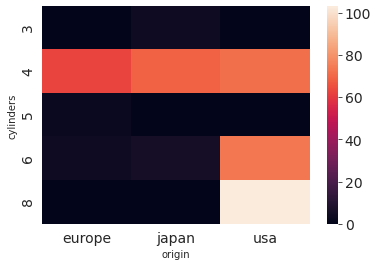

In [ ]:
sns.heatmap(origin_cyl.T);

In [ ]:
cars.corr()

mpg  cylinders  ...  acceleration  model_year
mpg           1.000000  -0.775396  ...      0.420289    0.579267
cylinders    -0.775396   1.000000  ...     -0.505419   -0.348746
displacement -0.804203   0.950721  ...     -0.543684   -0.370164
horsepower   -0.778427   0.842983  ...     -0.689196   -0.416361
weight       -0.831741   0.896017  ...     -0.417457   -0.306564
acceleration  0.420289  -0.505419  ...      1.000000    0.288137
model_year    0.579267  -0.348746  ...      0.288137    1.000000

[7 rows x 7 columns]

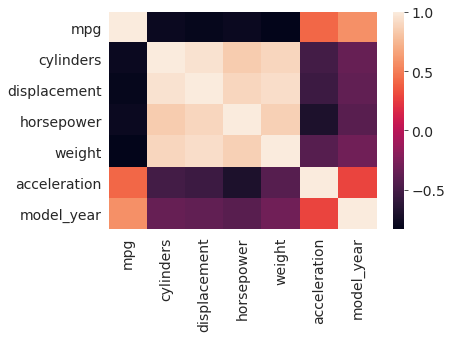

In [ ]:
sns.heatmap(cars.corr());

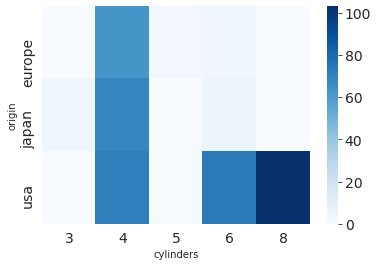

In [ ]:
sns.heatmap(origin_cyl, cmap="Blues");

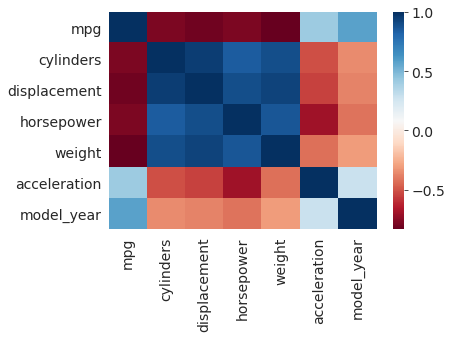

In [ ]:
sns.heatmap(cars.corr(), cmap='RdBu');

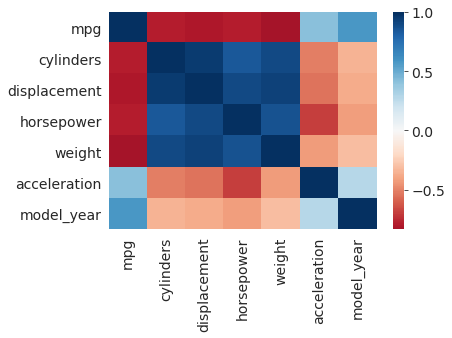

In [ ]:
sns.heatmap(cars.corr(), cmap='RdBu', center=0);

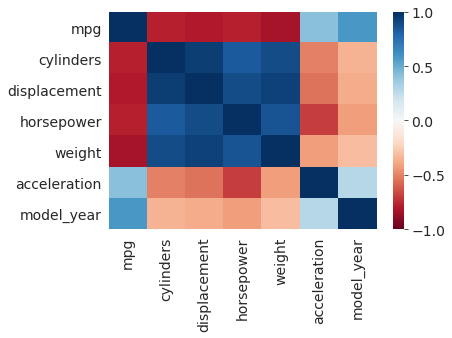

In [ ]:
sns.heatmap(cars.corr(), cmap='RdBu', vmin=-1, vmax=1);

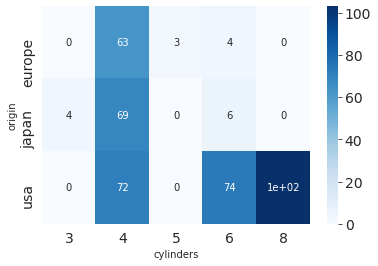

In [ ]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True);

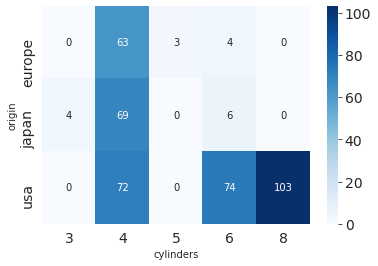

In [ ]:
sns.heatmap(origin_cyl, cmap='Blues', annot=True, fmt=".0f");  #fmt=".1f" for one decimal place

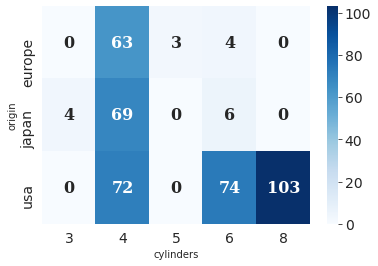

In [ ]:
sns.heatmap(origin_cyl, 
            cmap='Blues', 
            annot=True, 
            fmt=".0f",
            annot_kws={
                'fontsize': 16,
                'fontweight': 'bold',
                'fontfamily': 'serif',
               # 'color': 'black'
            });

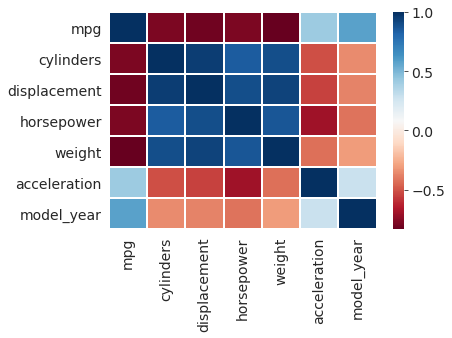

In [ ]:
# linewidth
sns.heatmap(cars.corr(), cmap='RdBu', linewidth=1);

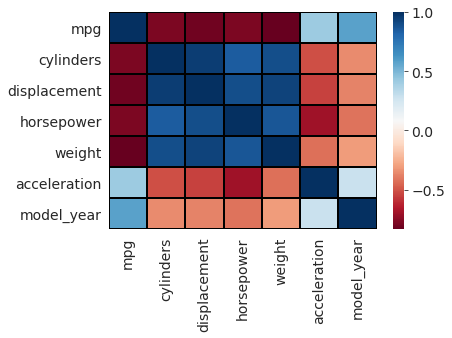

In [ ]:
# linecolor
sns.heatmap(cars.corr(), 
            cmap='RdBu', 
            linewidth=1,
            linecolor='black'
           );

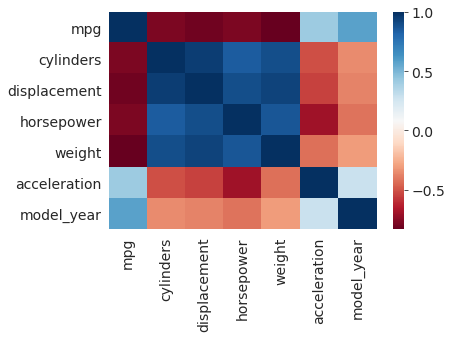

In [ ]:
sns.heatmap(cars.corr(), cmap='RdBu');

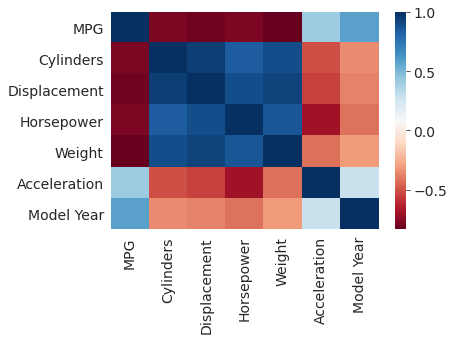

In [ ]:
labels = ['MPG', 'Cylinders', 'Displacement', 'Horsepower',
          'Weight', 'Acceleration', 'Model Year']

sns.heatmap(cars.corr(), 
            cmap='RdBu',
            xticklabels=labels,
            yticklabels=labels
           );         

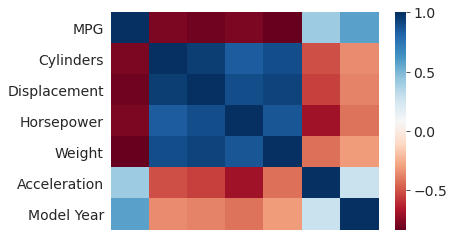

In [ ]:
sns.heatmap(cars.corr(), 
            cmap='RdBu', 
            xticklabels=False,
            yticklabels=labels );

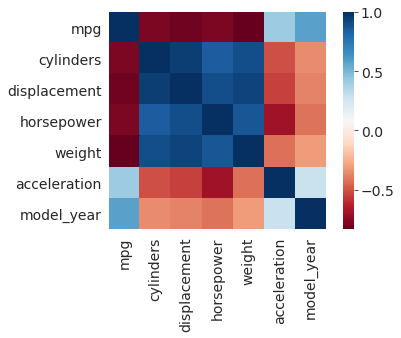

In [ ]:
# Square
sns.heatmap(cars.corr(), 
            cmap='RdBu',
            square=True
           );

In [ ]:
# Seaborn Heatmap Q&A
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

cars = sns.load_dataset('mpg')
cars.head()

mpg  cylinders  displacement  ...  model_year  origin                       name
0  18.0          8         307.0  ...          70     usa  chevrolet chevelle malibu
1  15.0          8         350.0  ...          70     usa          buick skylark 320
2  18.0          8         318.0  ...          70     usa         plymouth satellite
3  16.0          8         304.0  ...          70     usa              amc rebel sst
4  17.0          8         302.0  ...          70     usa                ford torino

[5 rows x 9 columns]

In [ ]:
# Does the Seaborn Heatmap accept MultiIndex DataFrames?  Yes.
grp_cyl = (cars.groupby('origin').cylinders.value_counts())
grp_cyl

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: cylinders, dtype: int64

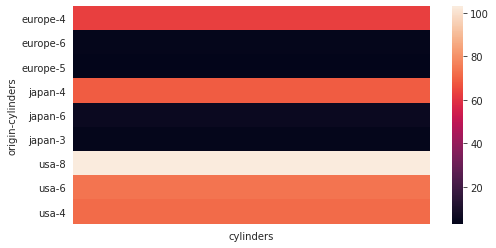

In [ ]:
sns.heatmap(pd.DataFrame(grp_cyl)); 

In [ ]:
grp_year = (cars
            .groupby(['origin', 'model_year'])
            [['cylinders', 'displacement']]
            .mean())

In [ ]:
grp_year.sample(5, random_state=11)

cylinders  displacement
origin model_year                         
usa    75           6.400000    253.400000
japan  80           4.076923    104.615385
       76           4.500000    107.250000
europe 78           4.833333    126.166667
       79           4.250000    126.000000

**!!!** Be careful about scale though!  

Average cylinders is much smaller than average displacement, so the heatmap maps the entire cylinders column to a similar color.

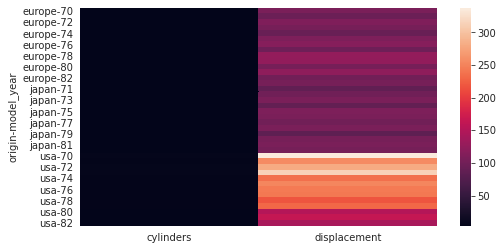

In [ ]:
sns.heatmap(grp_year);

# **Seaborn: pairplot**

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

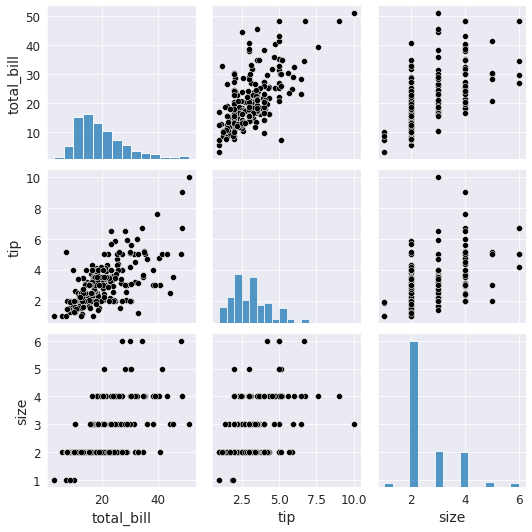

In [ ]:
# Intro Visuals
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)    

sns.set_style('darkgrid')
sns.pairplot(tips,  plot_kws={'color':'black'})
plt.tight_layout();

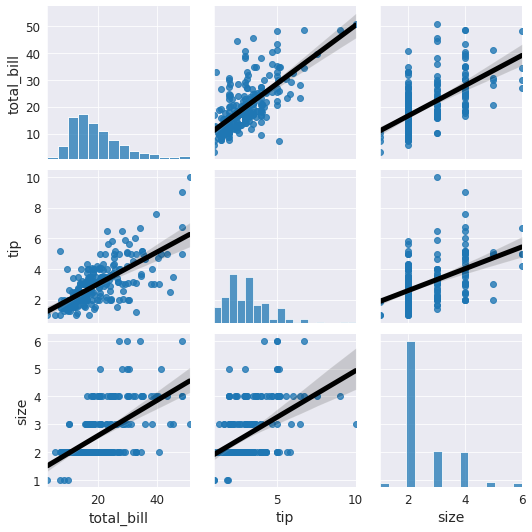

In [ ]:
sns.pairplot(tips, kind='reg', plot_kws={'line_kws': {'color':'black', 'lw': 5}})
plt.tight_layout();

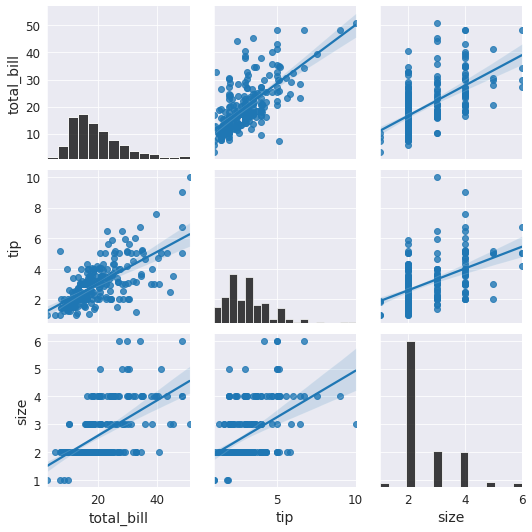

In [ ]:
sns.pairplot(tips, kind='reg', diag_kws={'color': 'black'} )
plt.tight_layout();

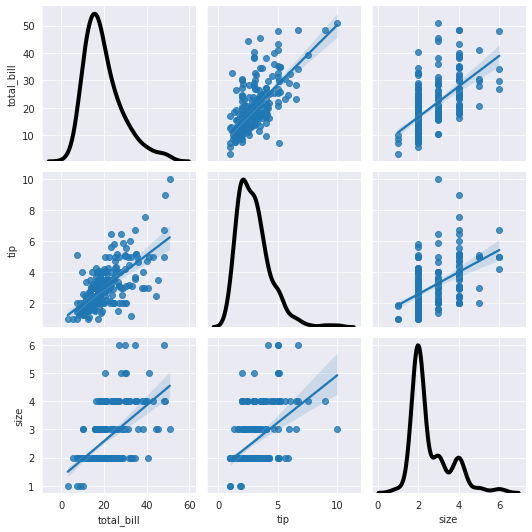

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)

sns.pairplot(tips, diag_kind='kde', kind='reg',
             diag_kws={'color': 'black', 'shade':False, 'lw': 4}
            )
plt.tight_layout();

## Basics

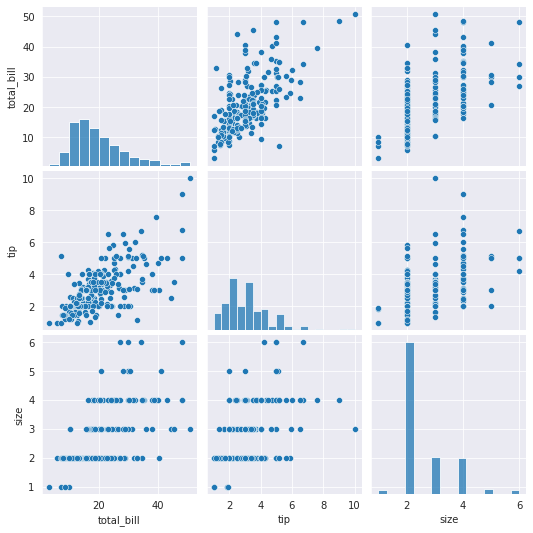

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(tips);

In [ ]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


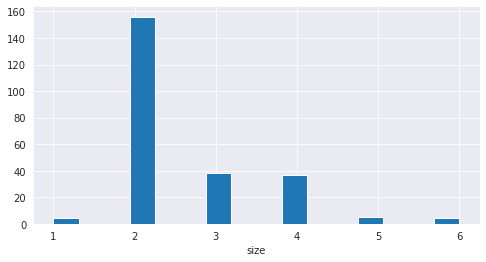

In [ ]:
sns.distplot(tips['size'], kde=False, hist_kws={'alpha':1});  

## Plot Kinds

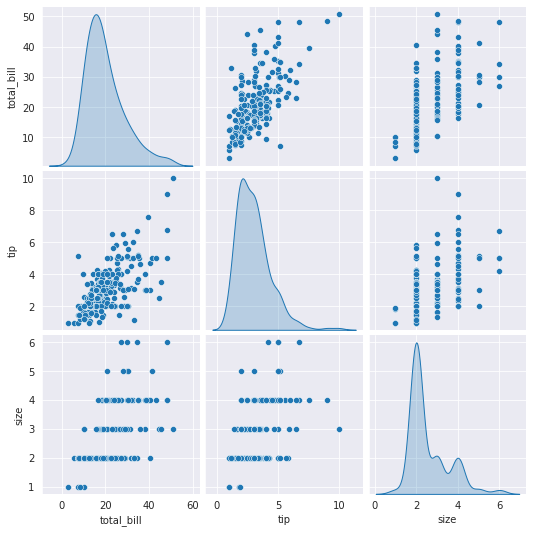

In [ ]:
# diag_kind
sns.pairplot(tips, diag_kind='kde');

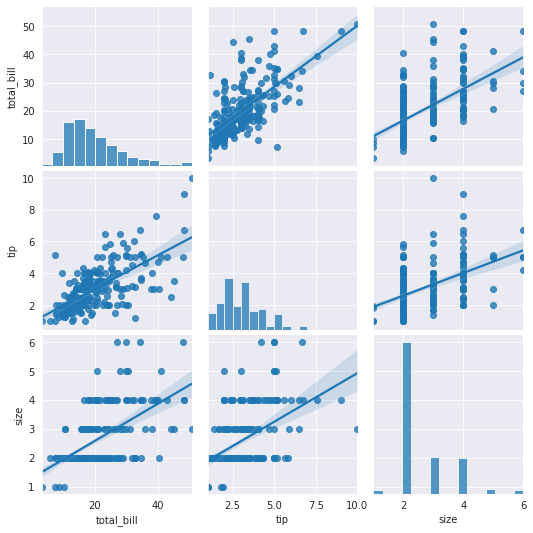

In [ ]:
# kind
sns.pairplot(tips, kind='reg');

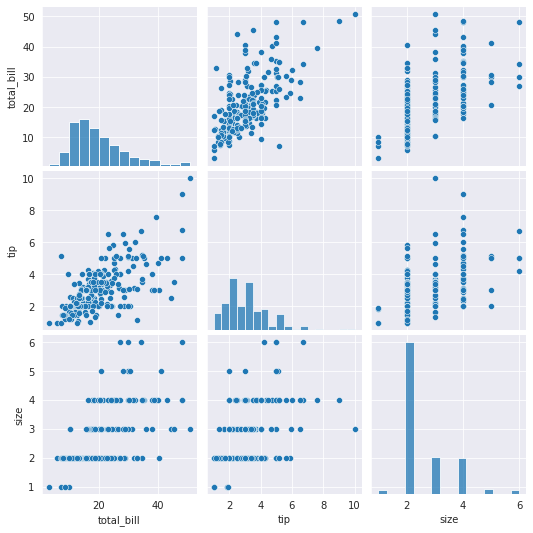

In [ ]:
# Returns PairGrid
g = sns.pairplot(tips)

In [ ]:
type(g)

seaborn.axisgrid.PairGrid

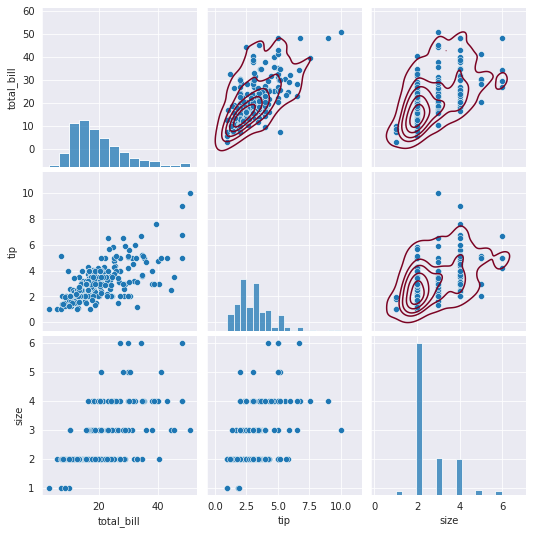

In [ ]:
g = sns.pairplot(tips)
g.map_upper(sns.kdeplot, n_levels=6, color='xkcd:wine red');

In [ ]:
tips['weekend'] = tips.day.isin(['Sat', 'Sun'])
tips.head()

total_bill   tip     sex smoker  day    time  size  weekend
0       16.99  1.01  Female     No  Sun  Dinner     2     True
1       10.34  1.66    Male     No  Sun  Dinner     3     True
2       21.01  3.50    Male     No  Sun  Dinner     3     True
3       23.68  3.31    Male     No  Sun  Dinner     2     True
4       24.59  3.61  Female     No  Sun  Dinner     4     True

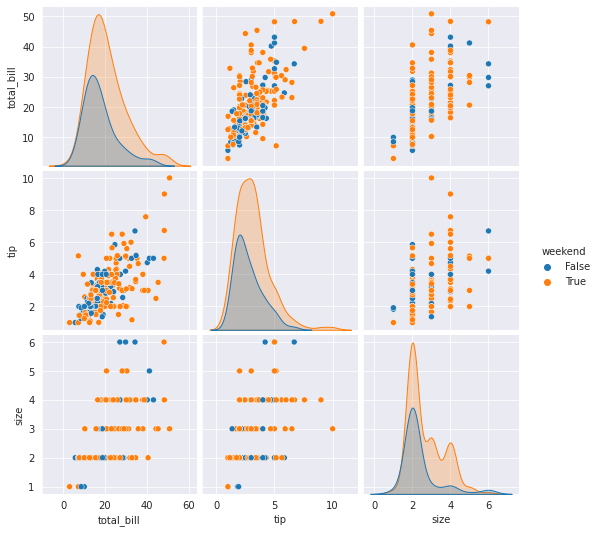

In [ ]:
# hue
sns.pairplot(tips, hue='weekend');

In [ ]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
weekend           bool
dtype: object

In [ ]:
# vars, x_vars, y_vars

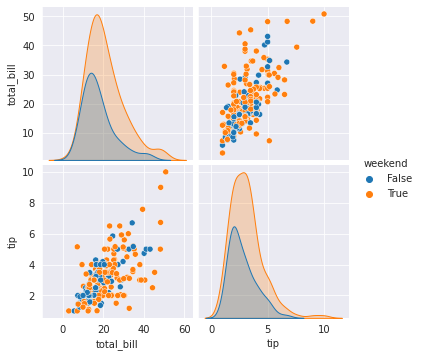

In [ ]:
sns.pairplot(tips, hue='weekend', vars=['total_bill', 'tip']);

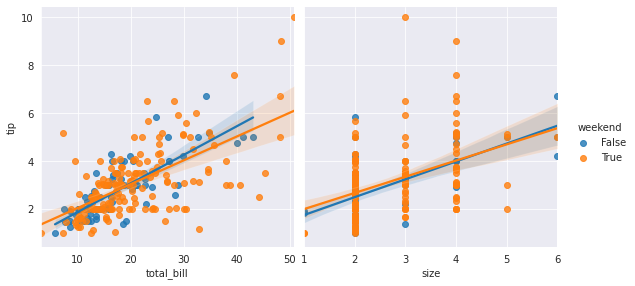

In [ ]:
sns.pairplot(tips, hue='weekend', y_vars=['tip'],x_vars=['total_bill', 'size'],
             kind='reg', height=4);

## Styling

In [ ]:
del tips['weekend']

In [ ]:
# height, aspect
from ipywidgets import interactive

def size_widget(height=2.5, aspect=1):
    sns.pairplot(tips, height=height, aspect=aspect)
interactive(size_widget, height=(1, 3.5, 0.5), aspect=(0.5, 2, 0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

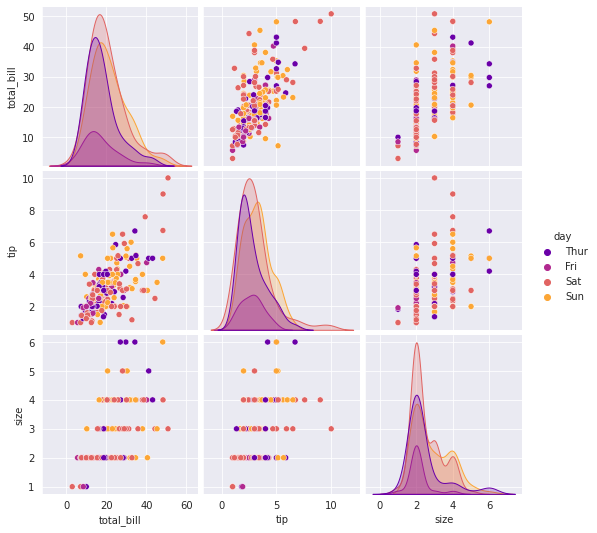

In [ ]:
# palette
sns.pairplot(tips, hue='day', palette='plasma');

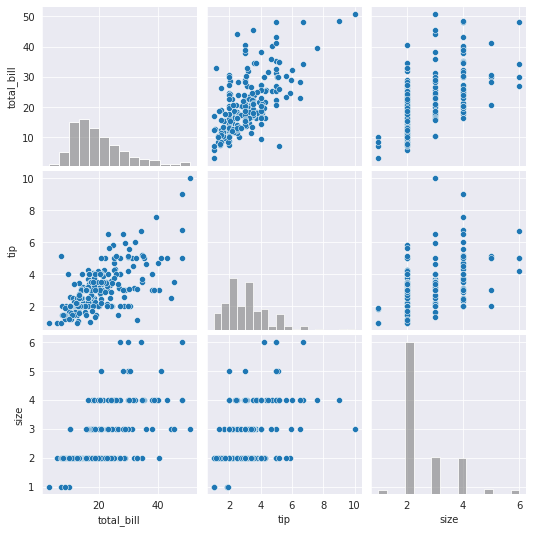

In [ ]:
# diag_kws, plot_kws
sns.pairplot(tips, diag_kws={'color': 'gray', 'alpha': 0.6});

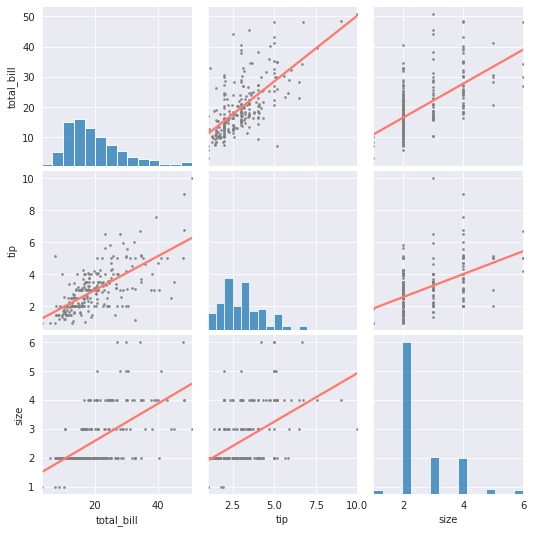

In [ ]:
sns.pairplot(tips, kind='reg', plot_kws={'ci':None, 'color': 'xkcd:salmon',
                       'scatter_kws': {'color': 'gray', 's': 3}});

# **Seaborn: jointplot**

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

geyser = sns.load_dataset('geyser')
geyser.head()

duration  waiting   kind
0     3.600       79   long
1     1.800       54  short
2     3.333       74   long
3     2.283       62  short
4     4.533       85   long

In [ ]:
geyser.shape

(272, 3)

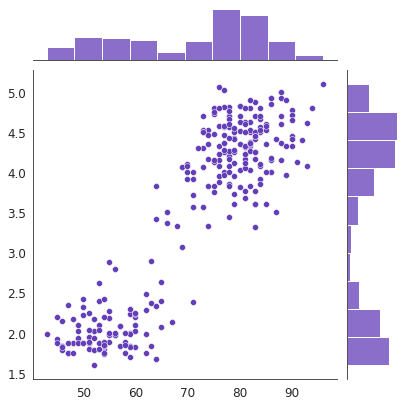

In [ ]:
import numpy as np

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)    
sns.set_style('white')
my_color = '#643db8'

j = sns.jointplot(x='waiting', y='duration', data=geyser, color=my_color)
j.ax_joint.set_xlabel('')
j.ax_joint.set_ylabel('');

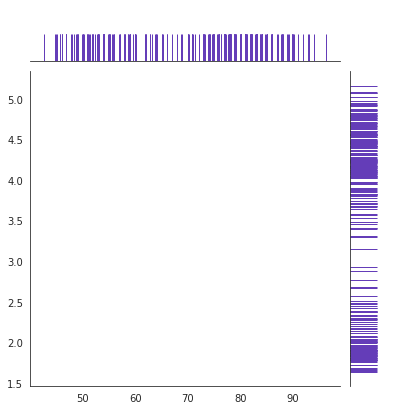

In [ ]:
j = sns.jointplot(x='waiting', y='duration', 
                  data=geyser.iloc[:, :-1]+np.random.normal(0, 0.15, size=geyser.iloc[:, :-1].shape), #adding "jitter"
                  color='white')
j.plot_marginals(sns.rugplot, height=.5, color=my_color)
j.ax_joint.set_xlabel('')
j.ax_joint.set_ylabel('');

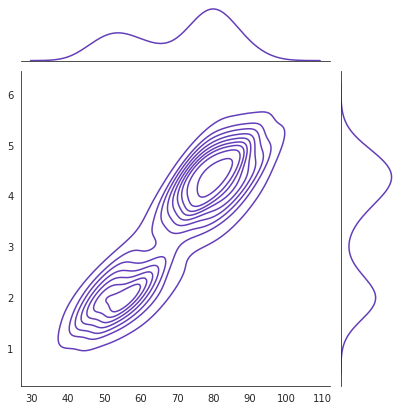

In [ ]:
j = sns.jointplot(x='waiting', y='duration', data=geyser, color=my_color, kind='kde')
j.ax_joint.set_xlabel('')
j.ax_joint.set_ylabel('');

## **Thumbnail Figure**

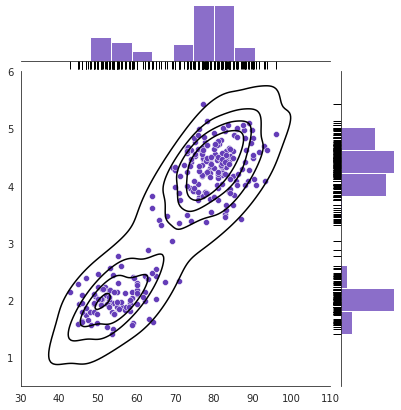

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)

j = sns.jointplot(x='waiting', y='duration', 
                  data=geyser.iloc[:, :-1]+np.random.normal(0, 0.15, size=geyser.iloc[:, :-1].shape), #adding "jitter"
                  color= my_color)
j.plot_marginals(sns.rugplot, height=-.15, color='black', clip_on=False)
j.plot_joint(sns.kdeplot, color='black', levels=5)
j.ax_joint.set_xlabel('')
j.ax_joint.set_ylabel('')
j.ax_joint.set_ylim(0.5, 6)
j.ax_joint.set_xlim(30, 110);

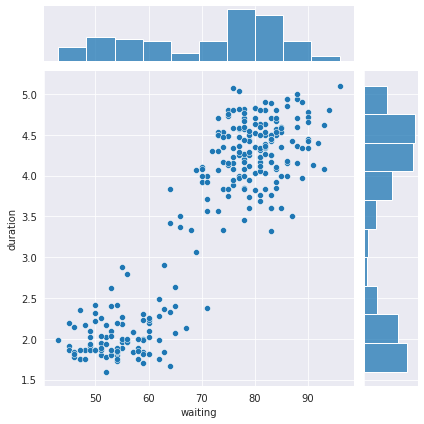

In [ ]:
sns.set_style('darkgrid')
sns.jointplot(x=geyser.waiting, y=geyser.duration);

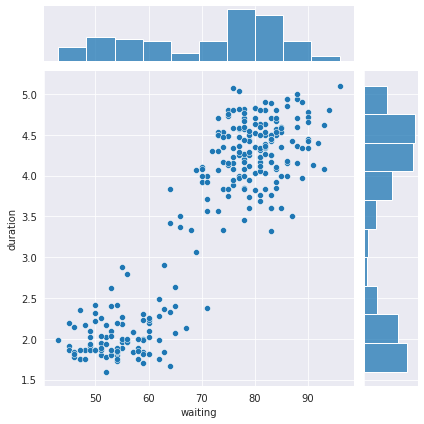

In [ ]:
sns.jointplot(x='waiting', y='duration', data=geyser);

## **Plot Kinds**

There are currently six kinds of jointplots allowed in seaborn:
1. scatter (default)
2. kde
3. reg 
4. hist
5. hex
6. resid

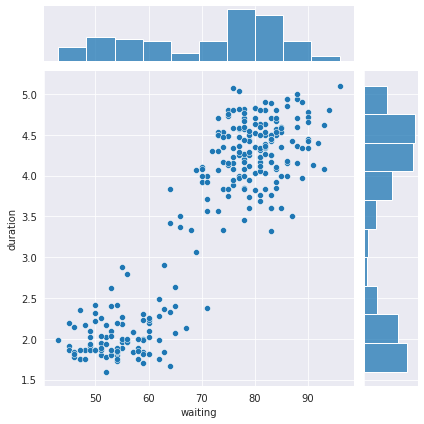

In [ ]:
# scatter (Default)
sns.jointplot(x='waiting', y='duration', data=geyser, kind='scatter' );

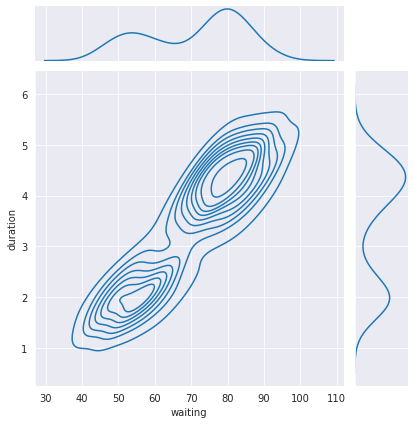

In [ ]:
# kde
sns.jointplot(x='waiting', y='duration', data=geyser, kind='kde');

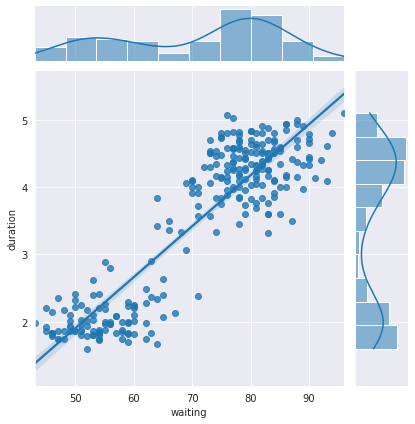

In [ ]:
# reg
sns.jointplot(x='waiting', y='duration', data=geyser, kind='reg' );

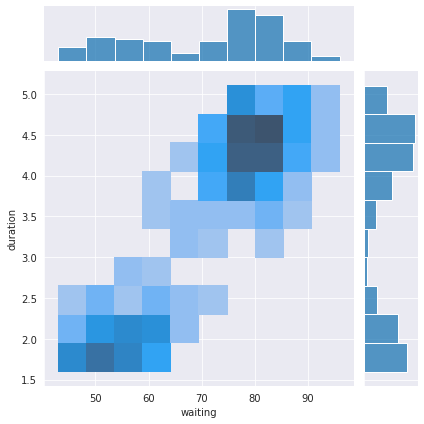

In [ ]:
# hist
sns.jointplot(x='waiting', y='duration', data=geyser,kind='hist');

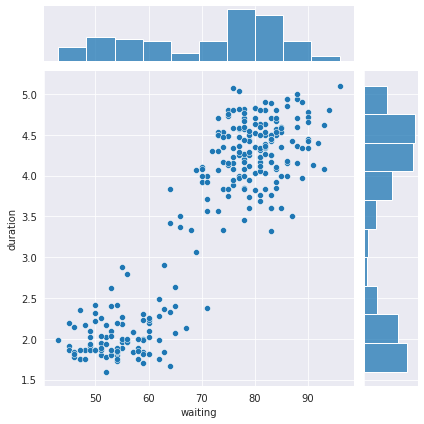

In [ ]:
# Returns JointGrid
g = sns.jointplot(x='waiting', y='duration', data=geyser);

In [ ]:
type(g)

seaborn.axisgrid.JointGrid

In [ ]:
g.plot_joint(sns.kdeplot, color='gray', levels=5);

## **Categorical Variables**

In [ ]:
geyser.head()

duration  waiting   kind
0     3.600       79   long
1     1.800       54  short
2     3.333       74   long
3     2.283       62  short
4     4.533       85   long

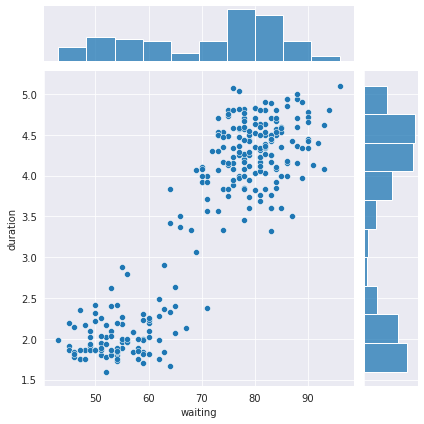

In [ ]:
# hue
sns.jointplot(x='waiting', y='duration', data=geyser);

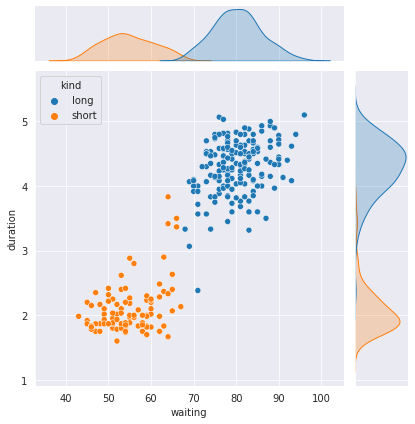

In [ ]:
sns.jointplot(x='waiting', y='duration',data=geyser, hue='kind');

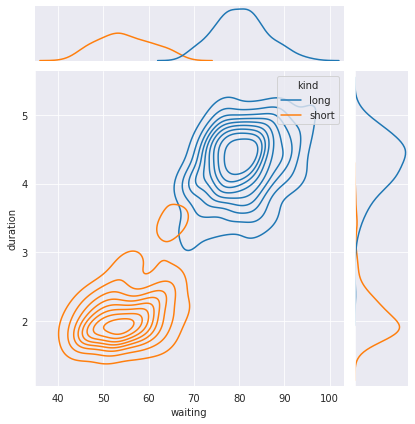

In [ ]:
sns.jointplot(x='waiting', y='duration', data=geyser, hue='kind', kind='kde');

## **Styling**

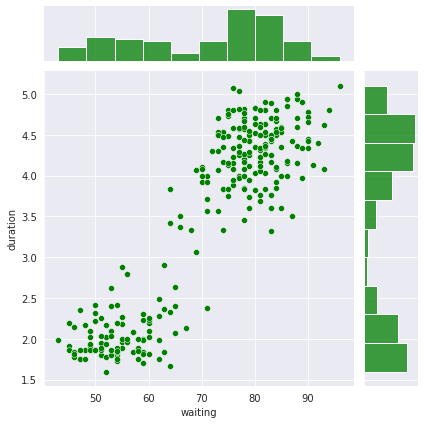

In [ ]:
# color, palette
sns.jointplot(x='waiting', y='duration', data=geyser,color='green');

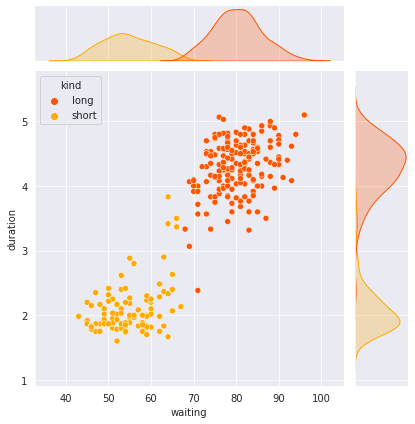

In [ ]:
sns.jointplot(x='waiting', y='duration', data=geyser, hue='kind', palette='autumn');

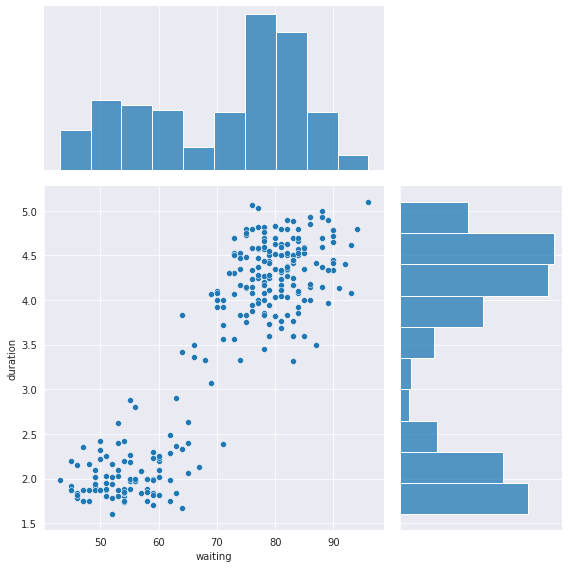

In [ ]:
# height, space, ratio
sns.jointplot(x='waiting', y='duration', data=geyser,
              height=8,   #Default: 6
              space=0.1,  #Default: 0.2
              ratio=2     #Default: 5
             );

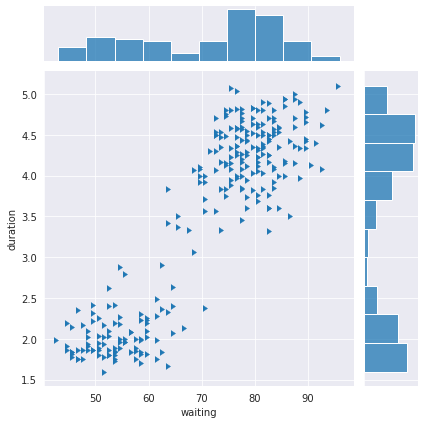

In [ ]:
# joint_kws
sns.jointplot(x='waiting', y='duration', data=geyser, joint_kws={'marker': 5});

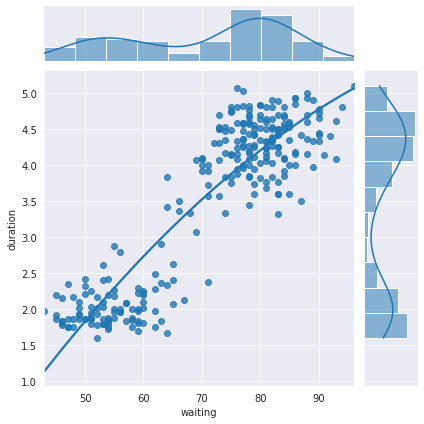

In [ ]:
sns.jointplot(x='waiting', y='duration', data=geyser, kind='reg',
              joint_kws={'ci': None, 'order': 2});

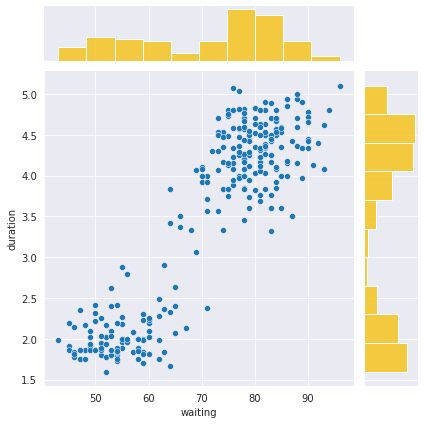

In [ ]:
# marginal_kws
sns.jointplot(x='waiting', y='duration', data=geyser,
              marginal_kws={'color': 'xkcd:golden'});

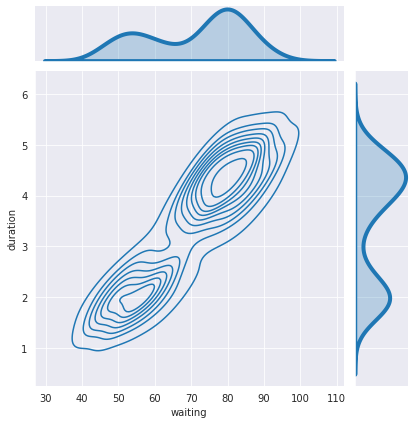

In [ ]:
sns.jointplot(x='waiting', y='duration', data=geyser, kind='kde',
              marginal_kws={'lw': 4, 'shade': True});

# **Seaborn: barplot**

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

penguins = sns.load_dataset('penguins')
penguins.head()

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0  Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1  Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2  Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
3  Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4  Adelie  Torgersen            36.7  ...              193.0       3450.0  Female

[5 rows x 7 columns]

In [ ]:
penguins.shape

(344, 7)

## **Intro Visuals**

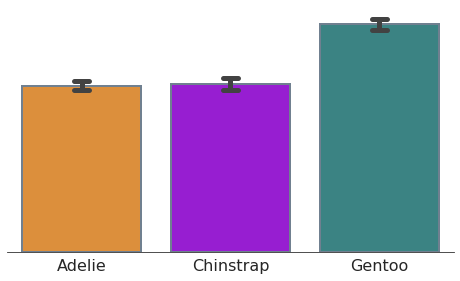

In [ ]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14)    
sns.set_style('white')

pen_pal = {'Gentoo': '#2F8F8F','Adelie': '#F79021',
           'Chinstrap': '#A200EF' }

plt.figure(figsize=(8, 4.5))
sns.barplot(x='species', y='body_mass_g', data=penguins, 
            palette=pen_pal, errwidth=5, capsize=0.1, ci=99.5, edgecolor='slategray', linewidth=2)
sns.despine(left=True)

#plt.ylabel('Body Mass (g)')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
plt.xticks(fontsize=16);           

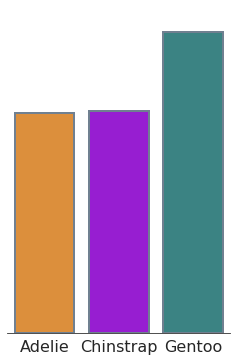

In [ ]:
plt.figure(figsize=(4, 6))
sns.barplot(x='species', y='body_mass_g', data=penguins, 
            palette=pen_pal, errwidth=5, capsize=0.1, ci=None, edgecolor='slategray', linewidth=2)
sns.despine(left=True)
#plt.ylabel('Body Mass (g)')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 5500)
plt.yticks([])
plt.xticks(fontsize=16);

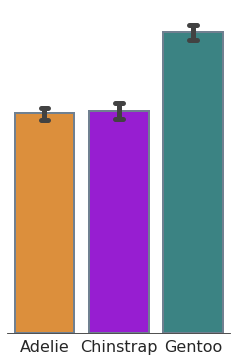

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)

plt.figure(figsize=(4, 6))
sns.barplot(x='species', y='body_mass_g', data=penguins, 
            palette=pen_pal, errwidth=5, capsize=0.1, ci=99.5, edgecolor='slategray', linewidth=2)
sns.despine(left=True)
#plt.ylabel('Body Mass (g)')
plt.xlabel('')
plt.ylabel('')
plt.ylim(0, 5500)
plt.yticks([])
plt.xticks(fontsize=16);

## Basics

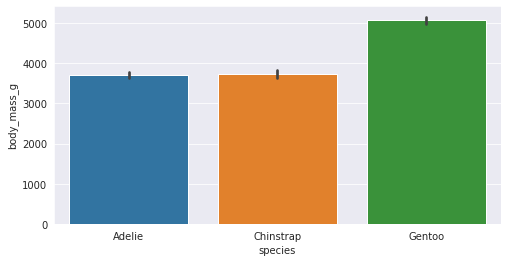

In [ ]:
sns.set_style('darkgrid')
sns.barplot(x='species', y='body_mass_g', data=penguins);

In [ ]:
penguins.groupby('species').body_mass_g.mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

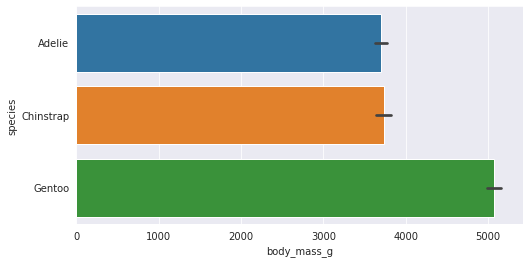

In [ ]:
# Horizontal Barplot
sns.barplot(x='body_mass_g', y='species', data=penguins);

## Interval Estimates

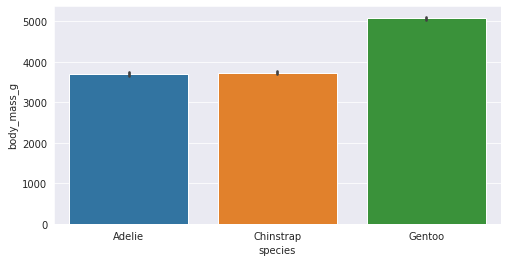

In [ ]:
# Confidence Interval (`ci`)
sns.barplot(x='species', y='body_mass_g', data=penguins,ci=68);

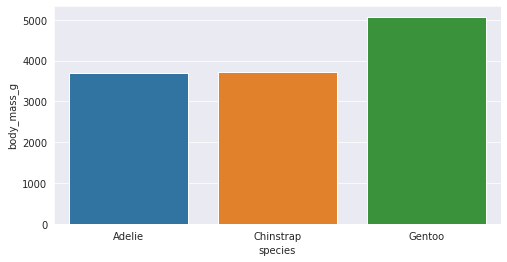

In [ ]:
sns.barplot(x='species', y='body_mass_g', data=penguins, ci=None );

## Estimator

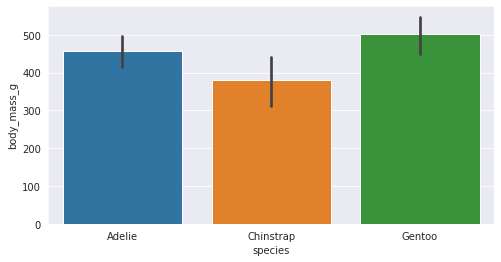

In [ ]:
sns.barplot(x='species', y='body_mass_g', 
            data=penguins,
            estimator=np.std
           );

In [ ]:
penguins.groupby('species').body_mass_g.describe()

count         mean         std  ...     50%     75%     max
species                                    ...                        
Adelie     151.0  3700.662252  458.566126  ...  3700.0  4000.0  4775.0
Chinstrap   68.0  3733.088235  384.335081  ...  3700.0  3950.0  4800.0
Gentoo     123.0  5076.016260  504.116237  ...  5000.0  5500.0  6300.0

[3 rows x 8 columns]

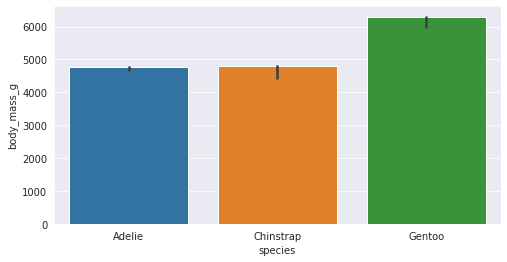

In [ ]:
sns.barplot(x='species', y='body_mass_g', 
            data=penguins,
            estimator=np.max
           );

## Categorical Variables

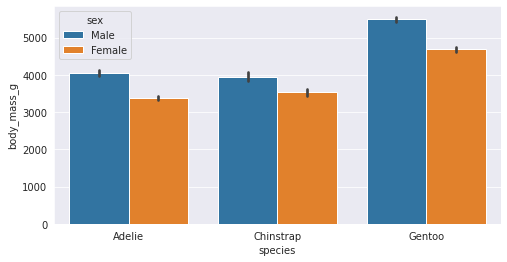

In [ ]:
sns.barplot(x='species', y='body_mass_g', 
            data=penguins,
            hue='sex'
           );

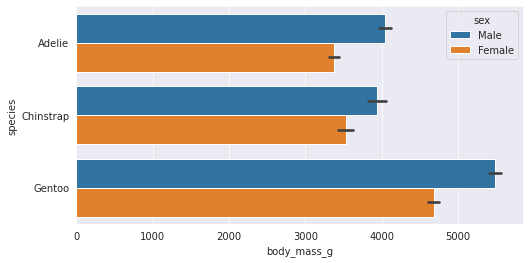

In [ ]:
sns.barplot(x='body_mass_g', y='species',  
            data=penguins,
            hue='sex'
           );

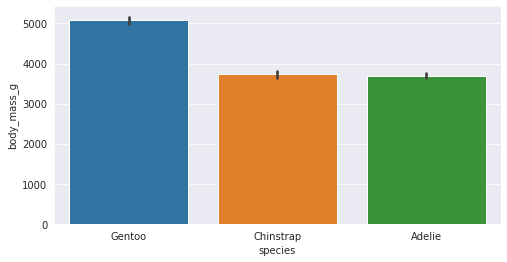

In [ ]:
# order, hue_order
sns.barplot(x='species', y= 'body_mass_g', 
            data=penguins,
            order=['Gentoo', 'Chinstrap', 'Adelie']
           );

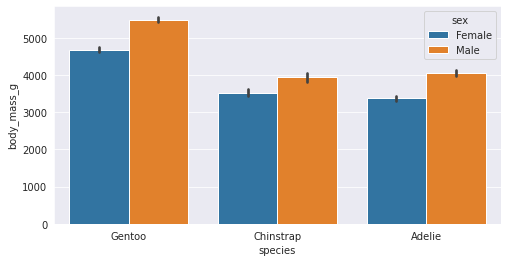

In [ ]:
sns.barplot(x='species', y= 'body_mass_g', 
            hue='sex',
            order=['Gentoo', 'Chinstrap', 'Adelie'],
            hue_order=['Female', 'Male'],
            data=penguins
           );

## Styling Colors

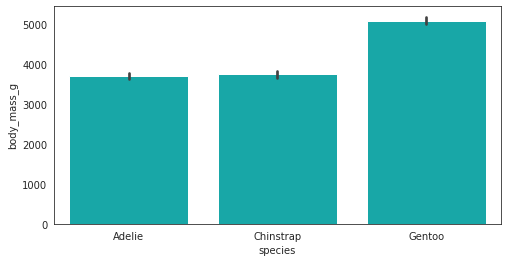

In [ ]:
sns.set_style('white')
sns.barplot(x='species', y='body_mass_g', 
            data=penguins, 
            color='c'
           );

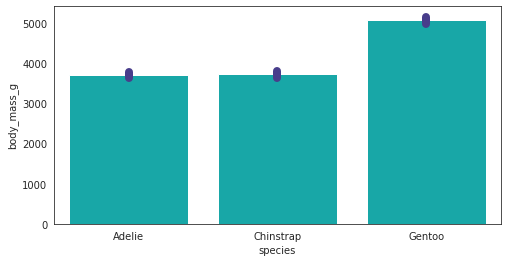

In [ ]:
# `errcolor` and `errwidth`
sns.barplot(x='species', y='body_mass_g', data=penguins, 
            color='c',
            errcolor='darkslateblue',
            errwidth=8
           );

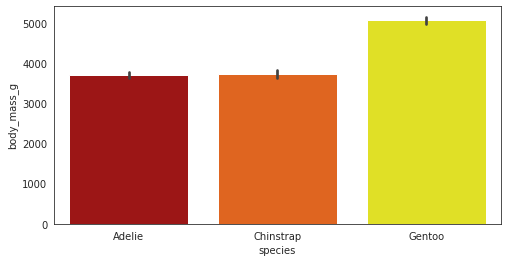

In [ ]:
# `palette`
sns.barplot(x='species', y='body_mass_g', 
            data=penguins,
            palette='hot'
           );

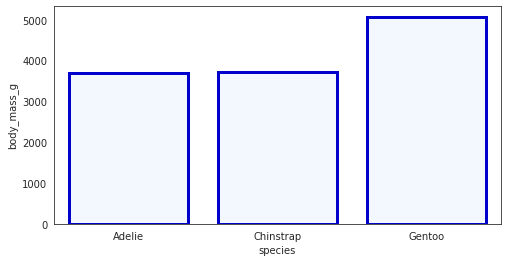

In [ ]:
# `edgecolor` and `linewidth`
sns.barplot(x='species', y='body_mass_g', data=penguins, ci=None,
            color='aliceblue',
            edgecolor='mediumblue',
            lw=3
           );

In [ ]:
# BONUS: Stacked Barplot
penguins_sample = penguins.dropna().groupby(['species', 'sex']).sample(3, random_state=10)
penguins_sample

species     island  ...  body_mass_g     sex
82      Adelie  Torgersen  ...       3800.0  Female
6       Adelie  Torgersen  ...       3625.0  Female
58      Adelie     Biscoe  ...       2850.0  Female
14      Adelie  Torgersen  ...       4400.0    Male
127     Adelie  Torgersen  ...       4300.0    Male
109     Adelie     Biscoe  ...       4775.0    Male
176  Chinstrap      Dream  ...       3300.0  Female
182  Chinstrap      Dream  ...       3200.0  Female
193  Chinstrap      Dream  ...       3650.0  Female
171  Chinstrap      Dream  ...       4400.0    Male
203  Chinstrap      Dream  ...       3950.0    Male
199  Chinstrap      Dream  ...       4300.0    Male
298     Gentoo     Biscoe  ...       4750.0  Female
310     Gentoo     Biscoe  ...       4950.0  Female
225     Gentoo     Biscoe  ...       4550.0  Female
229     Gentoo     Biscoe  ...       5150.0    Male
279     Gentoo     Biscoe  ...       5550.0    Male
257     Gentoo     Biscoe  ...       5250.0    Male

[18 rows x 7 columns]

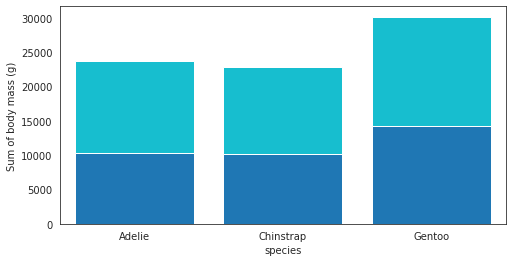

In [ ]:
from matplotlib import pyplot as plt
sns.barplot(x='species', y='body_mass_g',
            data=penguins_sample[penguins_sample.sex == 'Female'],
            color='tab:blue',
            order = ['Adelie', 'Chinstrap', 'Gentoo'],
            ci=None,
            estimator=np.sum,
            saturation=1
           )
sns.barplot(x='species', y='body_mass_g',
            data=penguins_sample[penguins_sample.sex == 'Male'],
            color='tab:cyan',
            order = ['Adelie', 'Chinstrap', 'Gentoo'],
            ci = None,
            estimator = np.sum,
            bottom=(
                penguins_sample[penguins_sample.sex == 'Female']
                .groupby('species')
                .body_mass_g
                .sum()),
            saturation=1
           )

plt.ylabel('Sum of body mass (g)');

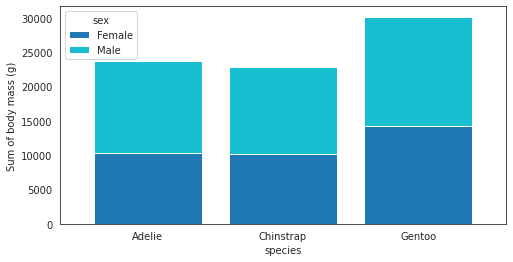

In [ ]:
sns.set_style('white')
(penguins_sample
    .groupby(['species', 'sex'])
    .body_mass_g
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.8)

plt.xticks(rotation=0)
plt.ylabel('Sum of body mass (g)');